## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single dataset
main_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
main_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice in the DataFrame.
total_mice = main_df["Mouse ID"].nunique()
print(f'Number of mice : {total_mice}')
total_case = main_df["Mouse ID"].count()
print(f'Number of cases : {total_case}')

Number of mice : 249
Number of cases : 1893


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Find a duplicate rows
dup_row = main_df[main_df.duplicated(['Mouse ID', 'Timepoint'])]
dup_row

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID.

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#main_df = main_df.set_index("Mouse ID")
#main_df.head()

In [8]:
#main_df = main_df.reset_index()   #Earlier I dropped the Mouse ID : 'g989'

In [9]:
# Drop Duplicated Datas
main_df = main_df.drop([909,911,913,915,917])
main_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean = main_df["Mouse ID"].nunique()
print(f'Number of mice after clean : {total_mice_clean}')
total_case_clean = main_df["Mouse ID"].count()
print(f'Number of cases after clean : {total_case_clean}')

Number of mice after clean : 249
Number of cases after clean : 1888


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
main_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
#Group by 'Drug Regimen' to do some calculations about it
regimens = main_df.groupby(main_df['Drug Regimen'])

In [13]:
reg_mean = regimens.mean()['Tumor Volume (mm3)']

In [14]:
reg_median = regimens.median()['Tumor Volume (mm3)']

In [15]:
reg_var = regimens.var()['Tumor Volume (mm3)']

In [16]:
reg_std = regimens.std()['Tumor Volume (mm3)']

In [17]:
reg_sem = regimens.sem()['Tumor Volume (mm3)']

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimens_cols = {
                    'Mean' : round(reg_mean,2),
                    'Median' : round(reg_median,2),
                    'Variance' : round(reg_var,2),
                    'STDEV' : round(reg_std,2),
                    'SEM' : round(reg_sem,2)
                }

regimens_df = pd.DataFrame(regimens_cols)
regimens_df

,Mean,Median,Variance,STDEV,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

In [108]:
#regimens_df = regimens_df.reset_index()
#regimens_df

In [116]:
#number of data points for each treatment regimen using pandas
reg_count = regimens.count()
reg_count_df = pd.DataFrame(reg_count['Mouse ID']).reset_index()
reg_count_df.head(2)

,Drug Regimen,Mouse ID
0,Capomulin,230
1,Ceftamin,178


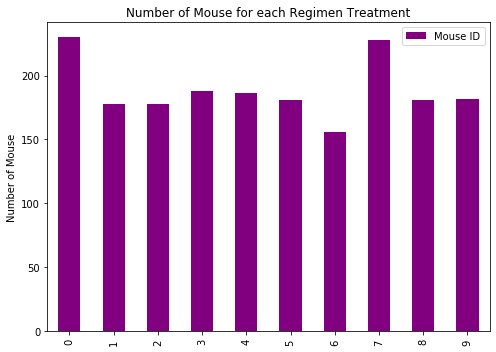

In [107]:
reg_count_df.plot(kind='bar',color='purple',figsize=(7,5))
plt.ylabel('Number of Mouse')
plt.title('Number of Mouse for each Regimen Treatment')
plt.tight_layout()

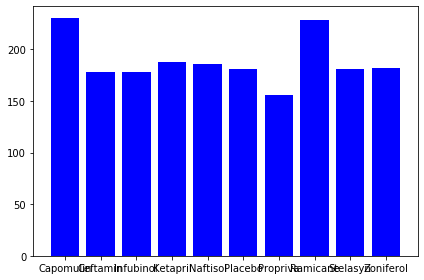

In [121]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_regimen = reg_count_df.loc[:,'Drug Regimen']
y_mouse = reg_count_df.loc[:,'Mouse ID']
plt.bar(x_regimen, y_mouse, color="b", align="center")
plt.tight_layout()


#tick_locations = x_regimen
#plt.xticks(tick_locations, x_regimen)

## Pie Plots

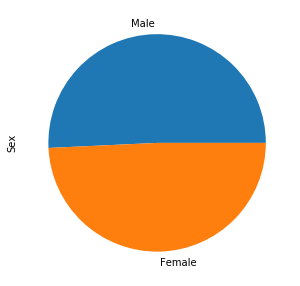

In [122]:
sex_pie = main_df['Sex'].value_counts()
plot = sex_pie.plot.pie(figsize=(5, 5))

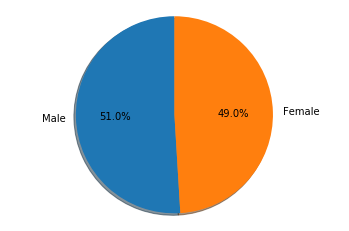

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male', 'Female'
sizes = [958,922]

fig, ax = plt.subplots()
ax.pie(sizes, autopct='%1.1f%%', labels=labels, shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Quartiles, Outliers and Boxplots

In [26]:
# Display Clean Main Dataframe, Total mouse = 249 after dropping duplicated datas
main_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [27]:
# Filter 4 most great regimens : Capomulin, Ramicane, Infubinol, Ceftamin
four_reg = main_df.loc[main_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
four_reg.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [28]:
# Filter final tumor volume of each mouse (use Timepoint at 45)
timepoint_45 = four_reg.loc[four_reg['Timepoint'] == 45]
timepoint_45.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [29]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = timepoint_45['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f'LQ : {lowerq}')
print(f'UQ : {upperq}')
print(f'IQR : {iqr}')
print(f'Median : {quartiles[.5]}')

LQ : 33.48002734
UQ : 62.14221369
IQR : 28.66218635
Median : 40.1592203


In [30]:
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Below {lower_bound} could be outliers")
print(f"Above {upper_bound} could be outliers")

Below -9.513252184999999 could be outliers
Above 105.135493215 could be outliers


In [31]:
outliers = timepoint_45.loc[(timepoint_45['Tumor Volume (mm3)'] < lower_bound) | (timepoint_45['Tumor Volume (mm3)'] > upper_bound)]
outliers.head()
# with the rule of (1.5*IQR), didn't find any outliers in these boudaries (MAYBE)
# tried out with (0*IQR), there are some outliers.

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [32]:
##### Generate a box plot of the final tumor volume of each mouse across four regimens of interest #####

#reg_4_group = timepoint_45.groupby(timepoint_45['Drug Regimen'])
#reg_4_df = pd.DataFrame(reg_4_group['Tumor Volume (mm3)'].value_counts())
#reg_4_df.head()

##### confused about how to pull out series of each regimens #####

In [33]:
# Manually create Series of each regimen : 'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'
capo_45 = timepoint_45.loc[timepoint_45['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)']
rami_45 = timepoint_45.loc[timepoint_45['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)']
infu_45 = timepoint_45.loc[timepoint_45['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)']
ceft_45 = timepoint_45.loc[timepoint_45['Drug Regimen'] == 'Ceftamin', 'Tumor Volume (mm3)']

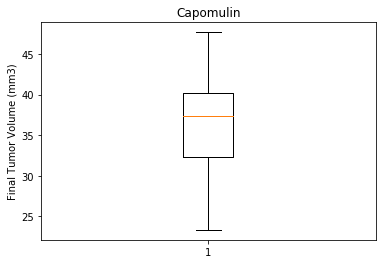

In [34]:
# Try out one boxplot -- Capomulin
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(capo_45)
plt.show()

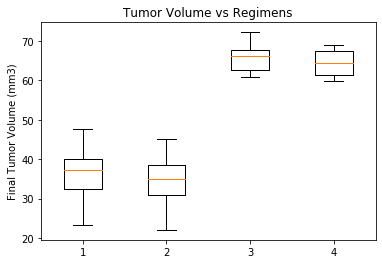

In [35]:
# All 4 regimens boxplots
box_45 = [capo_45, rami_45, infu_45, ceft_45]
fig, ax = plt.subplots()
ax.boxplot(box_45)
ax.set_title('Tumor Volume vs Regimens')
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [36]:
# Display Clean Main Dataframe, Total mouse of 249 after dropping duplicated datas
main_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [37]:
capo1 = main_df.loc[main_df['Drug Regimen'] == 'Capomulin']
capo1.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


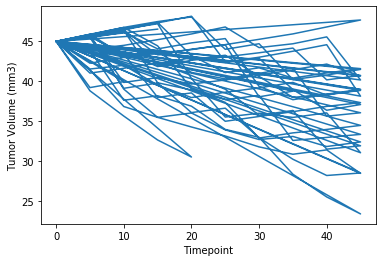

In [65]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
timepoint1 = capo1['Timepoint']
volume1 = capo1['Tumor Volume (mm3)']

plt.plot(timepoint1,volume1)

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

In [66]:
capo2 = capo1.loc[:, ['Weight (g)', 'Tumor Volume (mm3)']]
capo2.head()

,Weight (g),Tumor Volume (mm3)
10,17,45.000000
11,17,43.878496
12,17,37.614948
13,17,38.177232
14,17,36.866876


In [70]:
capo2_weight = capo2.groupby(capo2['Weight (g)'])
capo2_weight.mean()


capo2_weight_df = pd.DataFrame(capa2_weight.mean())
capo3 = capo2_weight_df.reset_index()

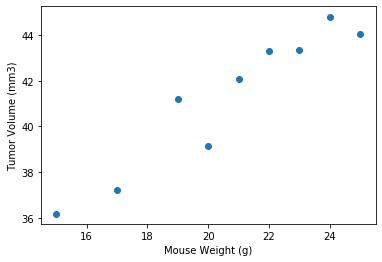

In [71]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_value = capo3['Weight (g)']
y_value = capo3['Tumor Volume (mm3)']

plt.scatter(x_value, y_value)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [73]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(x_value,y_value)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.95


In [ ]:
# for mouse weight and average tumor volume for the Capomulin regimen

In [89]:
x_value = capo3['Weight (g)']
y_value = capo3['Tumor Volume (mm3)']

lin_output = st.linregress(x_value, y_value)
print(lin_output)

LinregressResult(slope=0.894772609734063, intercept=22.764229983591896, rvalue=0.950524396185527, pvalue=8.449451040646223e-05, stderr=0.1105278286274132)


r-squared : 0.95


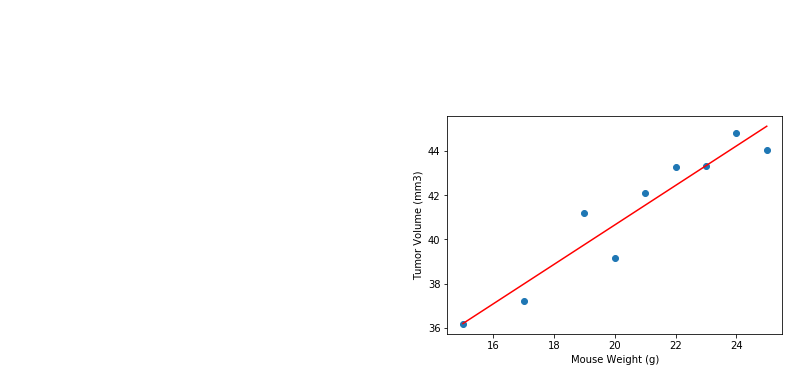

In [124]:
slope = lin_output[0]
intercept = lin_output[1]
rvalue = lin_output[2]
pvalue = lin_output[3]


regress_values = (x_value * slope) + intercept

lin_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value, y_value)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.plot(x_value,regress_values,"r")

plt.annotate(lin_eq,(0,50),fontsize=15,color="red")

print(f"r-squared : {round(rvalue,2)}")

plt.show()